# Projeto de Machine Learning

### Larissa Lewartoski Wong

# Identificação do problema e contextualização

Foi escolhido para esse projeto um dataset de domínio público, então não foi necessário realizar coleta dos dados.

## Dataset escolhido: Amazon Fine Food Reviews


#### O dataset está disponível em: https://www.kaggle.com/datasets/snap/amazon-fine-food-reviews/

![Dataset Escolhido](./imagens/dataset.png)

## Domínio do problema

O problema apresentado em questão envolve a análise de sentimentos para determinar a nota dada pelo cliente com base no conteúdo do review.

### Objetivo do trabalho

Este trabalho tem como objetivo principal o desenvolvimento e avaliação de um modelo de análise de sentimentos que possa analisar textos de avaliações e atribuir uma nota com base na polaridade dos sentimentos expressos no texto. Inicialmente será proposto e avaliado um modelo para determinar se a nota dada ao review foi 1 ou 5, com base nesse modelo inicial será possível avaliar se é viável expandir a determinação para todas as notas de 1 a 5.

# Aquisição e análise de dados

O conjunto de dados utilizado neste projeto foi obtido a partir do kaggle, não sendo necessária a realização do processo de coleta. A escolha do conjunto de dados se deu principalmente pelo interesse no processamento dos reviews. A princípio não houveram grandes dificuldades acerca do conjunto de dados. A maior dificuldade em relação ao projeto e ao conjunto de dados se deu em razão da necessidade de definir como seria separado o conjunto para aplicação de algoritmos. Em termos de documentação do dataset não houve nenhuma dificuldade no entendimento do que se tratavam os atributos e do que há no dataset.

## Definição do dataset

* O dados que integram o dataset são referentes a reviews realizados na plataforma Amazon, com foco nos reviews com tema comidas finas. O tema envolve comidas não necessariamente voltadas ao consumo humano e também é possível encontrar reviews de outras categorias no dataset. 
* Este dataset possui reviews realizados ao longo de mais de 10 anos com data final em outubro de 2012.
* Possui 9 atributos, desconsiderando o id.
* Possui 568,454 reviews
* Os atributos são de tipos variados, possuindo atributos numéricos e categóricos.

#### Em relação aos atributos:

Além da análise realizada por meio da documentação e observação do dataset foi realizada uma análise de tipos do dataset, localizada mais abaixo no documento.

- ProductId: código identificador único do produto (object, aparentemente strings com números e letras);
- UserId: código identificador único do usuário que fez o review (object, aparentemente strings com números e letras);
- ProfileName: nickname do usuário que fez o review (object, aparentemente strings com números e letras);
- HelpfulnessNumerator: número de usuários que marcaram o review como útil (número inteiro);
- HelpfulnessDenominator: número de usuários que marcaram o que acharam do review (sendo útil ou não) (número inteiro);
- Score: nota dada pelo usuário para o produto no review (número inteiro de 1 a 5);
- Time: timestamp de quando o review foi publicado (número inteiro);
- Summary: sumário do conteúdo do review (object, texto);
- Text: texto completo do review feito pelo usuário (object, texto).

## Análise exploratória dos dados

#### Import das bibliotecas utilizadas

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Carregamento do dataset

In [13]:
data = pd.read_csv('./amazon_fine_food_reviews/Reviews.csv')
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


#### Verificando os tipos de dados

In [14]:
data.dtypes

Id                         int64
ProductId                 object
UserId                    object
ProfileName               object
HelpfulnessNumerator       int64
HelpfulnessDenominator     int64
Score                      int64
Time                       int64
Summary                   object
Text                      object
dtype: object

#### Verificando a existência de valores nulos

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568438 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [16]:
pd.options.mode.use_inf_as_na = True
data.isnull().sum()

Id                         0
ProductId                  0
UserId                     0
ProfileName               16
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

#### Utilização do método describe para obter estatísticas descritivas para as variáveis numéricas

Com base no resultado obtido pelo método foi possível concluir que a maior parte dos reviews possui score entre 4 e 5 e que as marcações de outros usuários quanto à utilidade dos reviews é baixa .

In [17]:
data.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,568454.000000,568454.000000,568454.00000,568454.000000,5.684540e+05
mean,284227.500000,1.743817,2.22881,4.183199,1.296257e+09
std,164098.679298,7.636513,8.28974,1.310436,4.804331e+07
min,1.000000,0.000000,0.00000,1.000000,9.393408e+08
25%,142114.250000,0.000000,0.00000,4.000000,1.271290e+09
50%,284227.500000,0.000000,1.00000,5.000000,1.311120e+09
75%,426340.750000,2.000000,2.00000,5.000000,1.332720e+09
max,568454.000000,866.000000,923.00000,5.000000,1.351210e+09


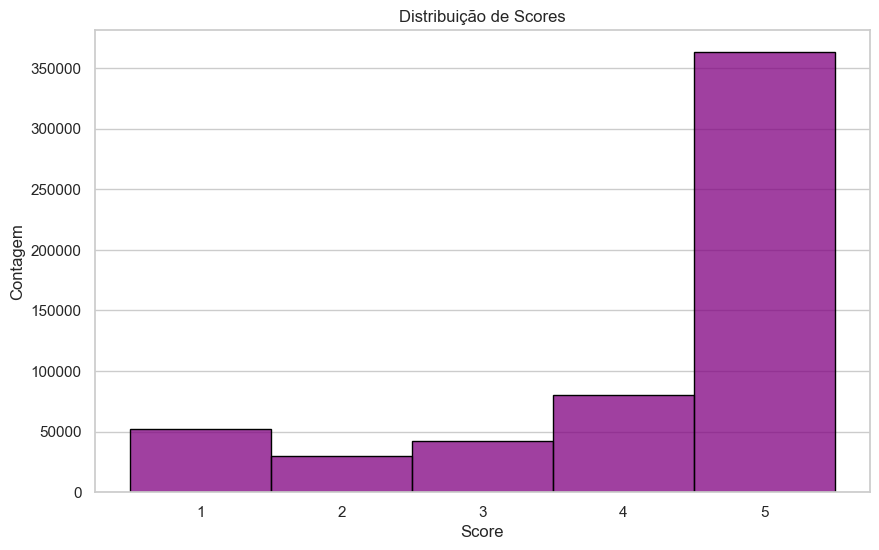

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurações opcionais para tornar os gráficos mais atraentes
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Cria o histograma para a coluna 'Score' com bins centrados em 1, 2, 3, 4, 5
bins = [0.5, 1.5, 2.5, 3.5, 4.5, 5.5]

sns.histplot(data['Score'], bins=bins, kde=False, color='purple', edgecolor='black')

# Adiciona rótulos e título
plt.xlabel('Score')
plt.ylabel('Contagem')
plt.title('Distribuição de Scores')

# Define os ticks do eixo x para representar as classificações
plt.xticks([1, 2, 3, 4, 5])

# Remove as linhas verticais do grid
ax = plt.gca()
ax.xaxis.grid(False)

# Exibe o histograma
plt.show()


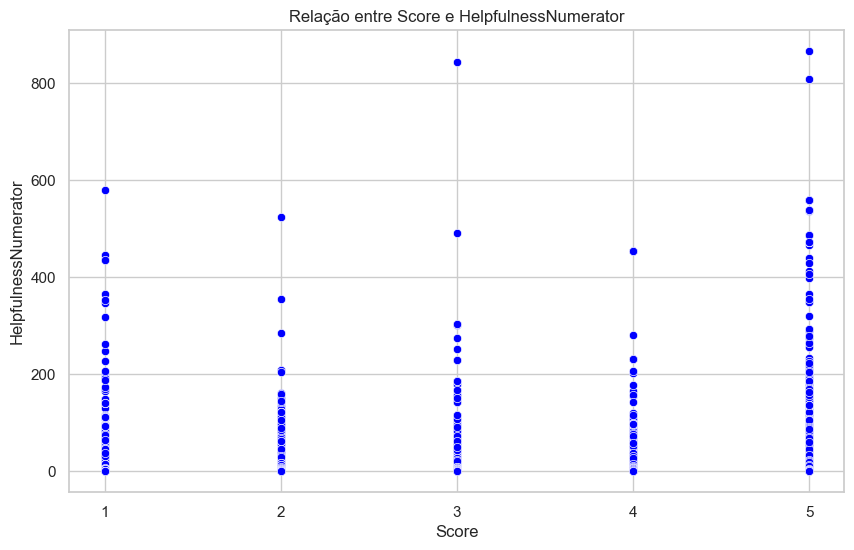

In [41]:
# Configurações opcionais para tornar os gráficos mais atraentes
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Cria o gráfico de dispersão entre 'Score' e 'HelpfulnessNumerator'
sns.scatterplot(x='Score', y='HelpfulnessNumerator', data=data, color='blue')

# Adiciona rótulos e título
plt.xlabel('Score')
plt.ylabel('HelpfulnessNumerator')
plt.title('Relação entre Score e HelpfulnessNumerator')

# Define os ticks do eixo x para representar apenas os valores desejados (1, 2, 3, 4, 5)
plt.xticks([1, 2, 3, 4, 5])

# Exibe o gráfico de dispersão
plt.show()

In [45]:
# Calcula o coeficiente de correlação de Pearson
correlation = np.corrcoef(data['HelpfulnessNumerator'], data['Score'])[0, 1]

print(f"Coeficiente de Correlação de Pearson: {correlation}")

Coeficiente de Correlação de Pearson: -0.032590113428634895


In [48]:
# Filtra o DataFrame original para incluir apenas linhas com Score igual a 1 ou 5
new_data = data[data['Score'].isin([1, 5])].copy()

new_data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
6,7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5,1340150400,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...
7,8,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,0,0,5,1336003200,"Wonderful, tasty taffy",This taffy is so good. It is very soft and ch...


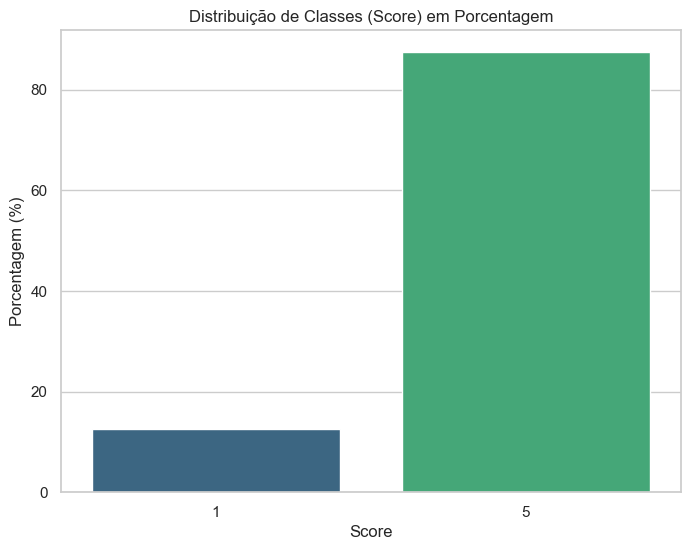

Distribuição de Classes (Score) em Porcentagem:
5    87.417126
1    12.582874
Name: Score, dtype: float64


In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configurações opcionais para tornar os gráficos mais atraentes
sns.set(style="whitegrid")

# Calcula a porcentagem de cada classe
porcentagens = new_data['Score'].value_counts(normalize=True) * 100

# Gráfico de barras para a distribuição de classes em porcentagem
plt.figure(figsize=(8, 6))
sns.barplot(x=porcentagens.index, y=porcentagens, palette='viridis')
plt.xlabel('Score')
plt.ylabel('Porcentagem (%)')
plt.title('Distribuição de Classes (Score) em Porcentagem')
plt.show()


# Calcula a porcentagem de cada classe
porcentagens = new_data['Score'].value_counts(normalize=True) * 100

# Imprime as porcentagens
print("Distribuição de Classes (Score) em Porcentagem:")
print(porcentagens)